In [34]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [35]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [36]:
import networkx as nx
import time
import random
import numpy as np
import pandas as pd
from random import randint
from multiprocessing.pool import Pool
from itertools import combinations
from psutil import Popen, TimeoutExpired
from networkx import Graph
from tempfile import NamedTemporaryFile
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
sns.set() # set the default Seaborn style for graphics

In [37]:
df = pd.read_csv('results.csv')

In [38]:
#splitting the data into exp 1 and exp 2
# Experiment 1: Adjacency Matrix and Priority Queue as Array
experiment_1 = df[(df['graph_adj'] == 'matrix') & (df['priority_queue'] == 'array')]

# Experiment 2: Adjacency List and Priority Queue as Heap
experiment_2 = df[(df['graph_adj'] == 'list') & (df['priority_queue'] == 'heap')]

In [39]:
# Display the results
print("Experiment 1 DataFrame:")
print(experiment_1)

Experiment 1 DataFrame:
      Unnamed: 0       ram      time  n_vertex    p_edge graph_adj  \
0              0   9175040  0.177792       550  0.315789    matrix   
3              3  11202560  0.339603       950  0.052632    matrix   
12            12   7319552  0.032318       450  0.052632    matrix   
13            13  18763776  0.398733       650  0.894737    matrix   
15            15   6225920  0.005291         1  0.157895    matrix   
...          ...       ...       ...       ...       ...       ...   
1661        1661   6225920  0.002168        50  0.473684    matrix   
1668        1668   7036928  0.002187       450  0.000000    matrix   
1673        1673   9453568  0.026353       350  0.789474    matrix   
1676        1676   7180288  0.017698       600  0.000000    matrix   
1678        1678   9101312  0.164740       550  0.263158    matrix   

     priority_queue  
0             array  
3             array  
12            array  
13            array  
15            array  
...

In [40]:
print("\nExperiment 2 DataFrame:")
print(experiment_2)


Experiment 2 DataFrame:
      Unnamed: 0       ram      time  n_vertex    p_edge graph_adj  \
2              2  45645824  0.286213       950  0.684211      list   
4              4  19165184  0.092360       650  0.526316      list   
5              5  18587648  0.098114       600  0.578947      list   
8              8   7458816  0.013824       150  0.789474      list   
14            14  27287552  0.162568       650  0.789474      list   
...          ...       ...       ...       ...       ...       ...   
1666        1666   6406144  0.001924        50  0.894737      list   
1667        1667  28405760  0.048034       600  1.000000      list   
1669        1669   6361088  0.001196        50  0.421053      list   
1670        1670   9719808  0.009908       750  0.105263      list   
1677        1677   6361088  0.018199        50  0.736842      list   

     priority_queue  
2              heap  
4              heap  
5              heap  
8              heap  
14             heap  
..

## Experiment 1: fixing the value of edges, then plotting the graph by varying the values of V and seeing its changes on the CPU_run time

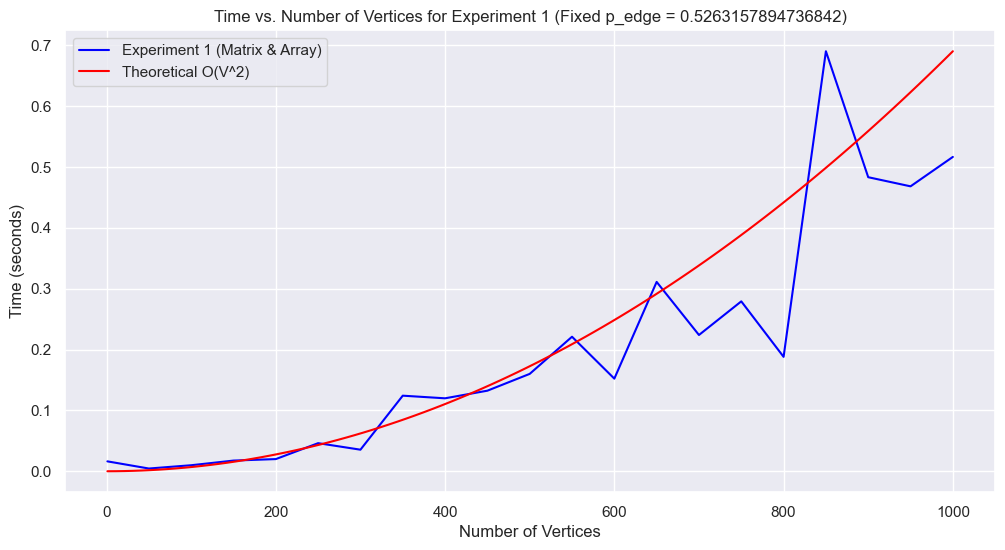

In [ ]:
# Fix the value of edges (p_edge)
fixed_p_edge = 0.5263157894736842  # Change this to the desired value

# Experiment 1: Adjacency Matrix and Priority Queue as Array with fixed edges
experiment_1 = df[(df['graph_adj'] == 'matrix') & (df['priority_queue'] == 'array') & (df['p_edge'] == fixed_p_edge)]

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot for Experiment 1
sns.lineplot(data=experiment_1, x='n_vertex', y='time', label='Experiment 1 (Matrix & Array)', color='blue')

# Define a range of vertices for the theoretical O(V^2) line
vertex_range = np.linspace(min(experiment_1['n_vertex']), max(experiment_1['n_vertex']), 100)
theoretical_time = vertex_range ** 2 * (max(experiment_1['time']) / (max(vertex_range) ** 2))  # Scale to match the time range

# Plot the theoretical O(V^2) line
plt.plot(vertex_range, theoretical_time, label='Theoretical O(V^2)', color='red', linestyle='-')

# Adding labels and title
plt.title(f'Time vs. Number of Vertices for Experiment 1 (Fixed p_edge = {fixed_p_edge})')
plt.xlabel('Number of Vertices')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Experiment 1: fixing the value of vertexes, then plotting the graph by varying the values of E and seeing its changes on the CPU_run time

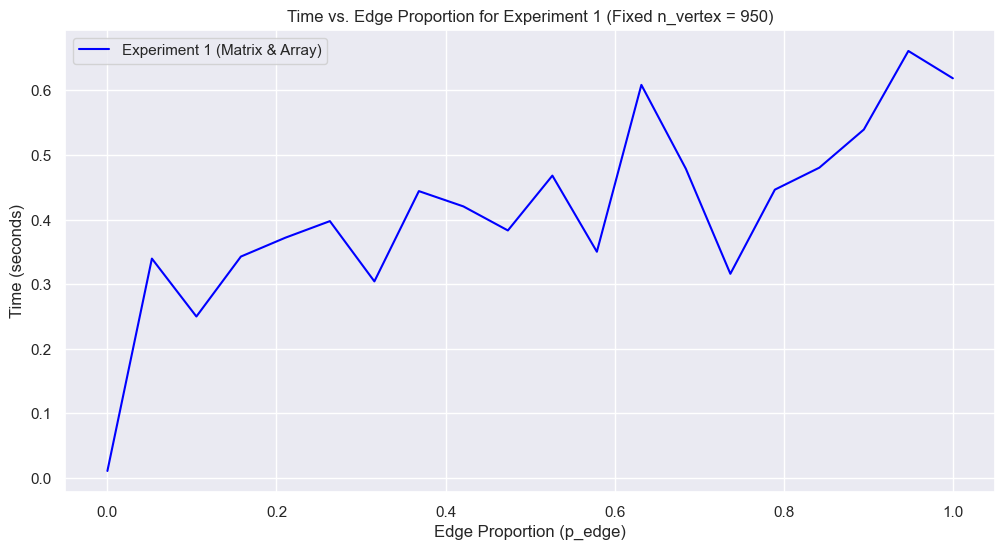

In [44]:
# Fix the number of vertices (n_vertex)
fixed_n_vertex = 950  # Change this to the desired value

# Experiment 1: Adjacency Matrix and Priority Queue as Array with fixed vertices
experiment_1 = df[(df['n_vertex'] == fixed_n_vertex) & (df['graph_adj'] == 'matrix') & (df['priority_queue'] == 'array')]

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot for Experiment 1
sns.lineplot(data=experiment_1, x='p_edge', y='time', label='Experiment 1 (Matrix & Array)', color='blue')

# Adding labels and title
plt.title(f'Time vs. Edge Proportion for Experiment 1 (Fixed n_vertex = {fixed_n_vertex})')
plt.xlabel('Edge Proportion (p_edge)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## Experiment 2: fixing the value of edges, then plotting the graph by varying the values of V and seeing its changes on the CPU_run time

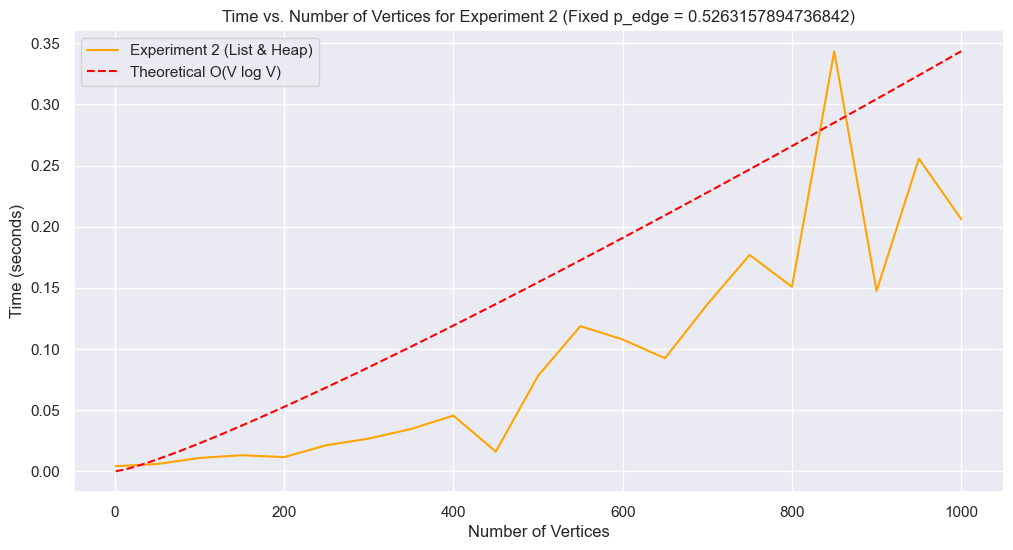

In [ ]:
# Fix the value of edges (p_edge)
fixed_p_edge = 0.5263157894736842  # Change this to the desired value

# Experiment 2: Adjacency List and Priority Queue as Heap with fixed edges
experiment_2 = df[(df['graph_adj'] == 'list') & (df['priority_queue'] == 'heap') & (df['p_edge'] == fixed_p_edge)]

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot for Experiment 2
sns.lineplot(data=experiment_2, x='n_vertex', y='time', label='Experiment 2 (List & Heap)', color='orange')

# Define a range of vertices for the theoretical O(V log V) line
vertex_range = np.linspace(min(experiment_2['n_vertex']), max(experiment_2['n_vertex']), 100)
theoretical_time = vertex_range * np.log2(vertex_range) * (max(experiment_2['time']) / (max(vertex_range) * np.log2(max(vertex_range))))  # Scale to match the time range

# Plot the theoretical O(V log V) line
plt.plot(vertex_range, theoretical_time, label='Theoretical O(V log V)', color='red', linestyle='--')

# Adding labels and title
plt.title(f'Time vs. Number of Vertices for Experiment 2 (Fixed p_edge = {fixed_p_edge})')
plt.xlabel('Number of Vertices')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Experiment 2: fixing the value of vertexes, then plotting the graph by varying the values of E and seeing its changes on the CPU_run time

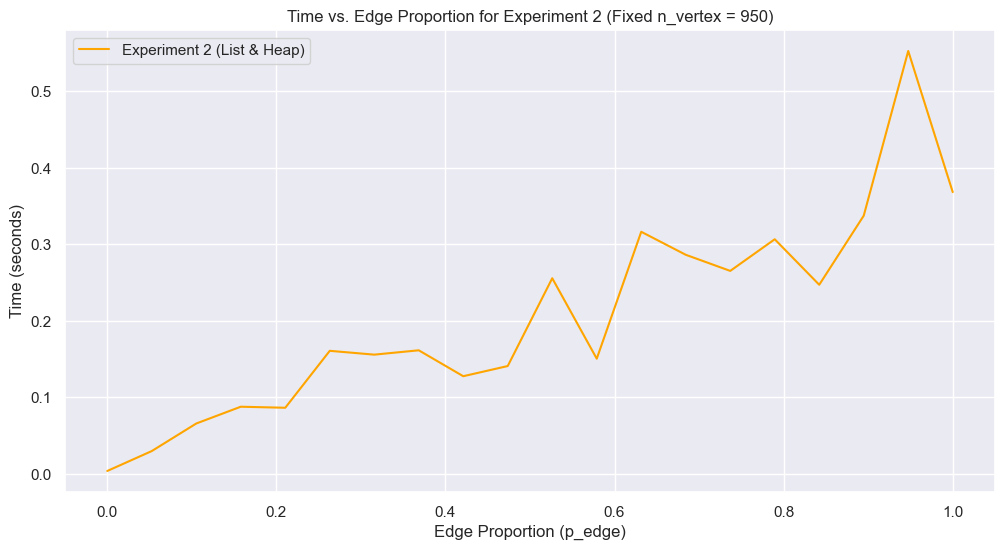

In [45]:
# Fix the number of vertices (n_vertex)
fixed_n_vertex = 950  # Change this to the desired value

# Experiment 2: Adjacency List and Priority Queue as Heap with fixed vertices
experiment_2 = df[(df['n_vertex'] == fixed_n_vertex) & (df['graph_adj'] == 'list') & (df['priority_queue'] == 'heap')]

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot for Experiment 2
sns.lineplot(data=experiment_2, x='p_edge', y='time', label='Experiment 2 (List & Heap)', color='orange')

# Adding labels and title
plt.title(f'Time vs. Edge Proportion for Experiment 2 (Fixed n_vertex = {fixed_n_vertex})')
plt.xlabel('Edge Proportion (p_edge)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()